# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 6</span>


In Statistical Mechanics the one-dimensional (1D) Ising Model is exactly resoluble. The Hamiltonian for a system of N spins with nearest neighbors interaction is given by (in the following I will assume units such that $\mu_B=1$ and $k_B=1$):

$$
H = 
-J\sum_{i=1}^N s_i s_{i+1}
-\frac{h}{2}\sum_{i=1}^N (s_i + s_{i+1}) 
$$

where $\{ s_i \}_{i=1,N}$ are spin variables taking values in $\{-1;1\}$, $J>0$ (ferromagnetic model),and with the assumption $s_{N+1} = s_{1}$.

The partition function for $N$ spins, $Z$, can be exactly computed and it turns out to be:

$$
Z=\sum_{\{ s_i \}} \exp \left( -\beta H\right) = \lambda_1^N + \lambda_2^N
$$

where
$\lambda_{1,2} = 
e^{\beta J} 
\cosh (\beta h) \pm \left[ e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J) \right]^{1/2}$, 
and where $\beta=\frac{1}{k_b T} = \frac{1}{T}$.
Once the partition function has been computed, the Helmholtz free energy is readly obtained as $A = -k_B T \ln Z$. All the thermodynamic quantities of interest can be deduced from $A$ or, equivalently, from $Z$:

- the **Internal Energy** per spin (with $h=0$):

$$
\frac{U(N,T)}{N} = \frac{\langle H \rangle}{N}
= \frac{1}{N} \sum_{\{ s_i \}} H \frac{\exp \left( -\beta H\right)}{Z}
= -\frac{1}{N}\frac{\partial \ln Z}{\partial \beta}
\underset{h=0}= -J \tanh (\beta J) \Biggl( \frac{1 + \tanh^{N-2} (\beta J)}{1+\tanh^N (\beta J)} \Biggl)
$$

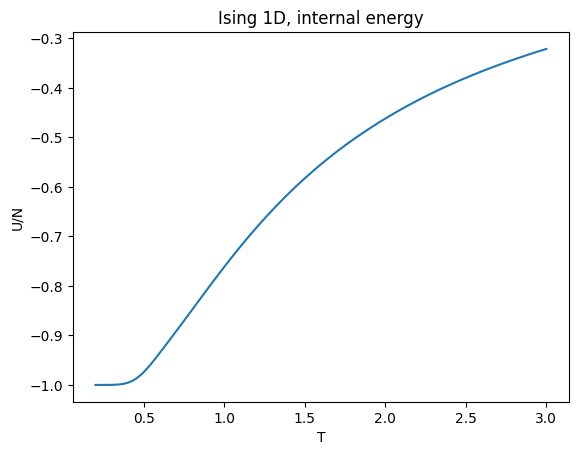

In [1]:
import numpy as np
import matplotlib.pyplot as plt
points=100
T = np.linspace(0.2,3.0,num=points)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
e = -J*( th + ch*thN )/( 1 + thN )
plt.plot(T, e)
plt.title('Ising 1D, internal energy')
plt.xlabel('T')
plt.ylabel('U/N')
plt.show()

- the **Heat Capacity** (with $h=0$):

$$
C(N,T) = \frac{\partial U(N,T)}{\partial T}
= \frac{\partial \beta}{\partial T}\frac{\partial U}{\partial \beta}
= -k_B\beta^2 \frac{\partial}{\partial \beta} \left[ \sum_{\{ s_i \}} H \frac{\exp \left( -\beta H\right)}{Z} \right] = \\
= -k_B\beta^2 \left[ -\sum_{\{ s_i \}} H^2 \frac{\exp \left( -\beta H\right)}{Z} + \sum_{\{ s_i \}} H \exp \left( -\beta H\right)\frac{\partial Z^{-1}}{\partial \beta} \right] = \\
= k_B\beta^2 \left\{ \sum_{\{ s_i \}} H^2 \frac{\exp \left( -\beta H\right)}{Z} + \left[ \sum_{\{ s_i \}} H \frac{\exp \left( -\beta H\right)}{Z}\right]\frac{1}{Z}\frac{\partial Z}{\partial \beta} \right\} =\\
= k_B\beta^2 \left\{ \sum_{\{ s_i \}} H^2 \frac{\exp \left( -\beta H\right)}{Z} - \left[ \sum_{\{ s_i \}} H \frac{\exp \left( -\beta H\right)}{Z}\right]^2 \right\} =
k_B\beta^2 \left(\langle H^2 \rangle -\langle H \rangle^2 \right)
$$

$$
\frac{C(N,T)}{N} = \frac{1}{N}\frac{\partial U(N,T)}{\partial T} =\\
\underset{h=0}= 
k_B (\beta J)^2 \left\{ 1+\tanh^N (\beta J)+(N-1)\tanh^2 (\beta J)+(N-1)\frac{\tanh^{N-2} (\beta J)}{1+\tanh^N (\beta J)}
- N \left[ \frac{\tanh (\beta J) + \tanh^{N-1} (\beta J)}{1+\tanh^N (\beta J)} \right]^2 \right\}
$$

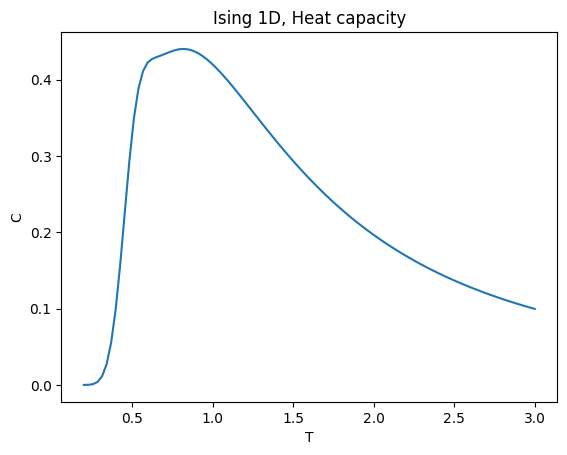

In [2]:
heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)
plt.plot(T, heat)
plt.title('Ising 1D, Heat capacity')
plt.xlabel('T')
plt.ylabel('C')
plt.show()

- The **magnetization** (with $h \not= 0$):

Note that with $h=0$ the magnetization $M(N,T,h=0)=\langle \sum_{i=1,N}s_i \rangle =0$ because in 1D we cannot have a (ferromagnetic) phase transition in absence of an external magnetic field.

$$
M(N,T,h) = -\frac{\partial A}{\partial h} = k_B T \frac{\partial \ln Z}{\partial h} =
\frac{1}{\beta} \frac{1}{Z}\frac{\partial}{\partial h}\sum_{\{ s_i \}} \exp \left( -\beta H\right) = \sum_{\{ s_i \}} \left[ \sum_{i=1,N}s_i\right] \frac{\exp \left( -\beta H\right)}{Z} = \left\langle \sum_{i=1,N}s_i \right\rangle
$$

The exact formula from $M(N,T,h) = k_B T \dfrac{\partial \ln Z}{\partial h}$ is:
$$
\frac{M(N,T,h)}{N}=\frac{e^{\beta J}\; \sinh(\beta h)}{Z} \; \Bigl[\lambda_1^{N-1}\cdot \Bigl(1+\frac{e^{\beta J}\; \cosh(\beta h)}{\sqrt{e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J)}}\Bigr) + \lambda_2^{N-1}\cdot \Bigl(1-\frac{e^{\beta J}\; \cosh(\beta h)}{\sqrt{e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J)}}\Bigr)\Bigr]
$$

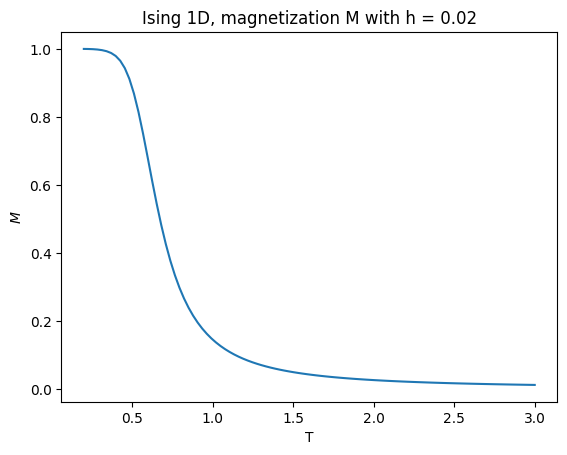

In [3]:
h=0.02 #external field
b = 1/T

l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)
plt.plot(T, M)
plt.title('Ising 1D, magnetization M with h = 0.02')
plt.xlabel('T')
plt.ylabel('$M$')
plt.show()

- The **magnetic susceptibility** (with $h=0$):

$$
\chi(N,T) = \frac{\partial M}{\partial h} = 
\frac{\partial}{\partial h}\sum_{\{ s_i \}} \left[ \sum_{i=1,N}s_i\right] \frac{\exp \left( -\beta H\right)}{Z} =\\
= \beta\sum_{\{ s_i \}} \left[ \sum_{i=1,N}s_i\right]^2 \frac{\exp \left( -\beta H\right)}{Z}
-\sum_{\{ s_i \}} \left[ \sum_{i=1,N}s_i\right] \frac{\exp \left( -\beta H\right)}{Z}
\frac{1}{Z}\frac{\partial Z}{\partial h} = 
\beta \left[ \left\langle \left( \sum_{i=1,N}s_i \right)^2 \right\rangle - \left\langle \sum_{i=1,N}s_i \right\rangle^2 \right] = \\
\underset{h=0}= \beta \left[ \left\langle \left( \sum_{i=1,N}s_i \right)^2 \right\rangle \right] = \beta e^{2\beta J} \Biggl( \frac{1-\tanh^N (\beta J)}{1+\tanh^N (\beta J)} \Biggl)
$$

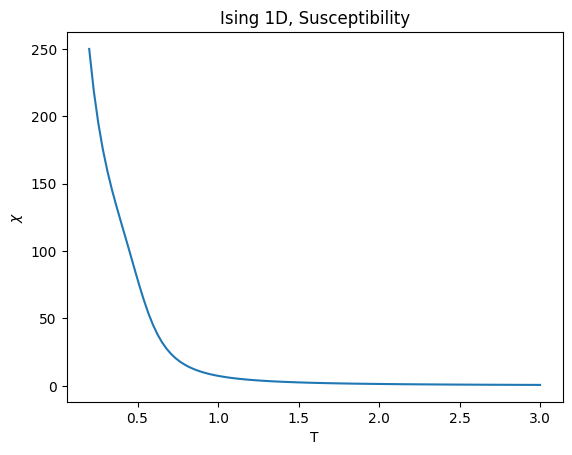

In [4]:
X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)
plt.plot(T, X)
plt.title('Ising 1D, Susceptibility')
plt.xlabel('T')
plt.ylabel('$\chi$')
plt.show()

### Exercise 06.1

Complete the NSL_simulator code to simulate a 1D Ising model with the Gibbs sampling algorithm (the Metropolis algorithm is already implemented) to sample the Boltzmann's weight $p(\{ s_i \}) = \exp(-\beta H)/Z$. Verify the possibility to restart from a previous spin configuration.

The code already computes the internal energy: $U(N,T) = \langle H \rangle$. Add the calculation of $C(N,T)$, $\chi(N,T)$, $M(N,T,h)$ and compute:
1. $U(N,T) = \langle H \rangle_{h=0}$
2. $C(N,T) = k_B \beta^2 (\langle H^2 \rangle_{h=0}-\langle H \rangle_{h=0}^2)$ 
3. $\chi(N,T) = \beta \langle (\sum_{i=1,N}s_i)^2 \rangle_{h=0}$
4. $M(N,T,h=0.02)= \langle \sum_{i=1,N}s_i \rangle_{h=0.02}$

as a function of $T$ in the range $\left[0.5;2.0\right]$ for a system of $N=50$ spins with $J=1$.

As usual, use data blocking and give an estimate of the statistical uncertainties.

- <span style="color:red">Show pictures of your estimations of $U(N,T)$, $C(N,T)$, $\chi(N,T)$, $M(N,T,h=0.02)$ and their uncertainties</span> obtained with a large number of *MC steps* (e.g. $M\ge 10^5$) compared with the exact curves. In the same picture show your results obtained with <span style="color:blue">both sampling methods, Metropolis and Gibbs</span>.

A Monte Carlo step will consist in trying to flip one time all the spins of the system. Do not forget to equilibrate your simulations and to use blocking average with blocks large enough.

## <span style="color:blue"> Svolgimento </span>

Per svolgere l'esercizio in esame, si sono aggiunti alla funzione Move del codice Monte_Carlo_ISING_1D gli algoritmi di Metropolis e di Gibbs. Per studiare le proprietà termodinamiche richieste, il sistema di N particelle deve essere all'equilibrio fissata una temperatura T. Anche per questo esercizio sarà quindi necessario termalizzare prima il sistema. 

### Metropolis

Partendo da una configurazione iniziale degli spin delle particelle, si definisce una mossa di Metropolis per il modello di Ising il cambio di segno di spin di una particella scelta pseudocasualmente; per decidere se accettare o meno tale mossa, si è calcolato il peso di Boltzmann:
$$ e^{-\beta (E_{new}-E_{old})}$$

I valori di energia $E_{new}$ , $E_{old}$ sono stati calcolati considerando unicamente il contributo dell'hamiltoniana degli spin vicini a quello selezionalo. L'efficiacia di tale metodo è dovuta al fatto che non è necessario calcolare la normalizzazione della distribuzione probabilità, quantità spesso difficile se non impossibile da calcolare analiticamente (e numericamente). La probabilità di accettazione è data dunque da: 
$$ A=min[ 1, e^{-\beta (E_{new}-E_{old})} ]$$

Qualora $A=1$ si ha $E_{new} < E_{old}$, ovvero il sistema evolve verso una configurazione ad energia minore, la mossa è dunque automaticamente accettata. Altrimenti, si estrae pseudocasualmente un numero r, uniformemente distribuito tra $[ 0,1 ]$, e la mossa viene accettata quando $r<A$.

### Gibbs

L'algoritmo di Gibbs è un caso particolare dell'algoritmo di Metropolis dove ogni mossa proposta ha un'accettazione del 100%, si può dimostrare la convergenza di tale metodo utilizzando il bilancio dettagliato (in modo simile alla dimostrazione dell'algoritmo di Metropolis). Per un sistema a temperatura $T$ fissata, permette di avvicinarsi all'equilibrio estraendo una particella in modo pseudocasuale e fissando il valore del suo spin in base alla probabilità condizionata $p$, definita dagli altri spin:
$$ p = \frac{1}{1-e^{-\beta (E_{up}+E_{down})}} $$

Anche in questo caso, i valori di energia $E_{up}$ , $E_{down}$ sono stati calcolati considerando unicamente il contributo dell'hamiltoniana degli spin vicini. Si è poi estratto numero r uniformemente distribuito tra $[ 0,1 ]$, se $r<p$ si ha spin down, altrimenti si ha spin up.

### Termalizzazione

Per determinare il numero di iterazioni necessarie a termalizzare il sistema, si sono eseguite $M=2500$ simulazioni, suddivise in altrettanti blocchi da due elementi ciascuno, e si è graficato l'andamento dell'energia interna. Poiché il sistema raggiunge l'equilibrio in modo continuo, si è stabilito che il numero di passi necessari per la termalizzazione coincidesse con il numero del blocco dopo il quale $U$ oscilla intorno a un valore costante.

### Simulazione

Sono sotto riportati i grafici di energia interna, capacità termica, suscettività magnetica e magnetizzazione, in funzione della temperatura. Le simulazioni, per ogni $T$, sono effettuate partendo da un sistema termalizzato e usando 30 blocchi da $10^4$ passi Monte Carlo.

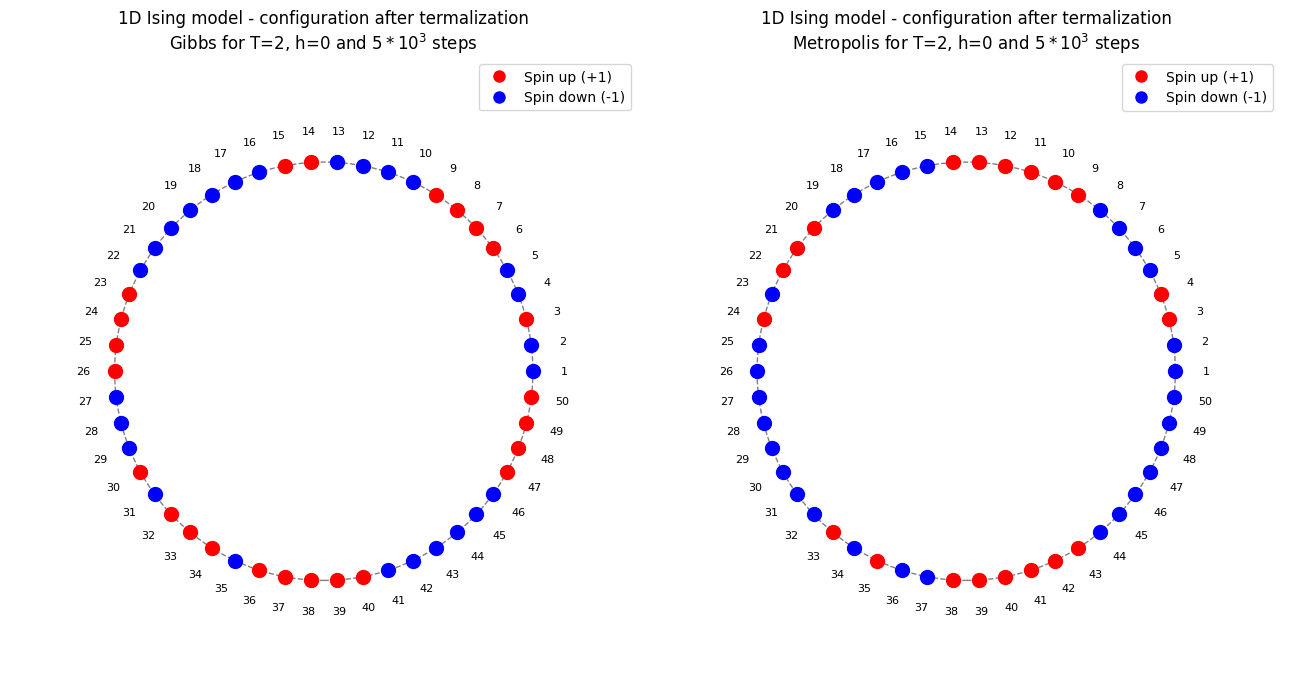

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# FUNCTIONS DEFINITION

# Step 1: Read the configuration file
def read_config(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()
    # Split each line into separate values and flatten the list
    return [int(value) for line in lines for value in line.split()]

# Step 2: Generate positions in a circle
def generate_circle_positions(n):
    angles = np.linspace(0, 2 * np.pi, n, endpoint=False)
    x = np.cos(angles)
    y = np.sin(angles)
    return x, y

# Step 3: Draw the particles
def draw_particles(ax, x, y, colors, labels, title):
    ax.set_aspect('equal')
    
    # Set a radial offset for labels
    label_offset = 1.15  # Adjust this value to control the distance of labels from the center
    
    # Draw particles with labels
    for (xi, yi, color, label) in zip(x, y, colors, labels):
        ax.plot(xi, yi, 'o', color=color, markersize=10)
        
        # Calculate the position for the labels
        label_x = xi * label_offset
        label_y = yi * label_offset
        ax.text(label_x, label_y, label, color='black', ha='center', va='center', fontsize=8)
        
    # Draw circumference
    circle = plt.Circle((0, 0), 1, color='gray', fill=False, linestyle='--')
    ax.add_artist(circle)
    
    # Set limits and title
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)
    ax.axis('off')
    ax.set_title(title)
    
    # Add legend
    red_patch = plt.Line2D([0], [0], marker='o', color='w', label='Spin up (+1)', markerfacecolor='red', markersize=10)
    blue_patch = plt.Line2D([0], [0], marker='o', color='w', label='Spin down (-1)', markerfacecolor='blue', markersize=10)
    ax.legend(handles=[red_patch, blue_patch], loc='upper right')

# FIGURE GENERATION

# Read configurations
config_gibbs = read_config('ISING_1D/OUTPUT/CONFIG/TermGibbs/config.spin')     
config_metro = read_config('ISING_1D/OUTPUT/CONFIG/TermMetropolis/config.spin')

# Determine colors and labels
colors_gibbs = ['red' if val == 1 else 'blue' for val in config_gibbs]
labels_gibbs = [str(i + 1) for i in range(len(config_gibbs))]

colors_metro = ['red' if val == 1 else 'blue' for val in config_metro]
labels_metro = [str(i + 1) for i in range(len(config_metro))]

# Generate positions
x_gibbs, y_gibbs = generate_circle_positions(len(config_gibbs))
x_metro, y_metro = generate_circle_positions(len(config_metro))

# Create a subplot with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 7))

# Draw particles for GIBBS
draw_particles(ax1, x_gibbs, y_gibbs, colors_gibbs, labels_gibbs, '1D Ising model - configuration after termalization\nGibbs for T=2, h=0 and $5*10^3$ steps')

# Draw particles for METRO
draw_particles(ax2, x_metro, y_metro, colors_metro, labels_metro, '1D Ising model - configuration after termalization\nMetropolis for T=2, h=0 and $5*10^3$ steps')

# Show the plot
plt.tight_layout()
plt.show()

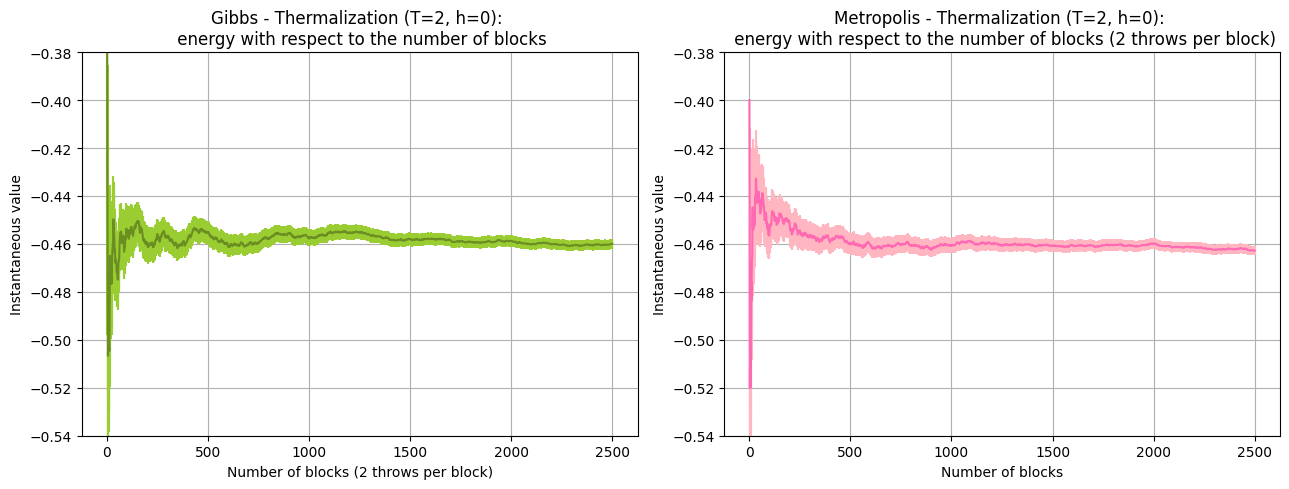

In [2]:
import matplotlib.pyplot as plt

# Function to read data from the file
# Function to read data from the file
def read_data(file_path):
    n_blk = []
    instant = []
    error_inst = []
    with open(file_path, 'r') as file:
        for line in file:
            # Skip comment lines
            if line.startswith('#'):
                continue
            parts = line.split()
            n_blk.append(float(parts[0]))
            instant.append(float(parts[2]))
            error_inst.append(float(parts[3]))
    return n_blk, instant, error_inst

# Read the data
n_blk_gibbs, instant_gibbs, error_inst_gibbs = read_data('ISING_1D/OUTPUT/TermGibbs/total_energy.dat')
n_blk_metro, instant_metro, error_inst_metro = read_data('ISING_1D/OUTPUT/TermMetropolis/total_energy.dat')

# Create a subplot with 1 row and 2 columns
plt.figure(figsize=(13, 5))

# Plot for GIBBS data
plt.subplot(1, 2, 1)
plt.errorbar(n_blk_gibbs, instant_gibbs, error_inst_gibbs, linestyle='-', ecolor='yellowgreen', color='olivedrab')
plt.xlabel('Number of blocks (2 throws per block)')
plt.ylabel('Instantaneous value')
plt.ylim(-0.54,-0.38)
plt.title('Gibbs - Thermalization (T=2, h=0): \n energy with respect to the number of blocks')
plt.grid(True)

# Plot for METRO data
plt.subplot(1, 2, 2)
plt.errorbar(n_blk_metro, instant_metro, error_inst_metro, linestyle='-', ecolor='lightpink', color='hotpink')
plt.xlabel('Number of blocks')
plt.ylabel('Instantaneous value')
plt.ylim(-0.54,-0.38)
plt.title('Metropolis - Thermalization (T=2, h=0): \n energy with respect to the number of blocks (2 throws per block)')
plt.grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

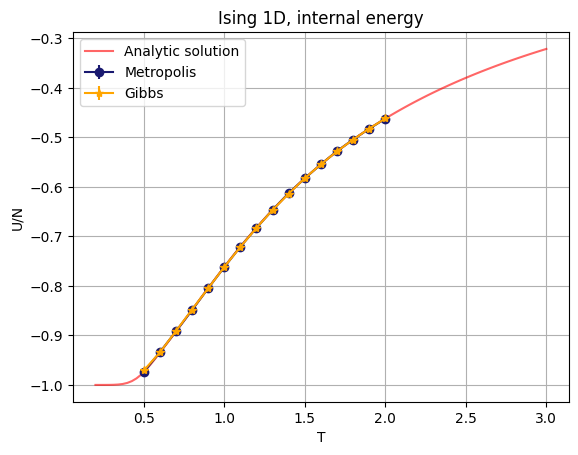

In [54]:
import numpy as np
import matplotlib.pyplot as plt
points=100
T = np.linspace(0.2,3.0,num=points)
beta = (1/T)
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
e = -J*( th + ch*thN )/( 1 + thN )

alg = ["Metropolis","Gibbs"]
marker = ['o','*']
colors = ['midnightblue','orange']

for i in range(2):
    t = []
    mean = []
    sigma = []
    file = open("ISING_1D/OUTPUT/"+alg[i]+"/total_energy.out", "r")
    for line in file:  # to read every line of the file
        if line.startswith('#'):
            continue
        elements = line.split()
        t.append(float(elements[0]))
        mean.append(float(elements[1]))
        sigma.append(float(elements[2]))
    file.close()
    plt.errorbar(t, mean, yerr=sigma, marker=marker[i], markersize=6, label=alg[i], color=colors[i]) #, colors[i]
    plt.grid(True)

plt.plot(T, e, color= "red", alpha=0.6, label="Analytic solution")
plt.title('Ising 1D, internal energy')
plt.xlabel('T')
plt.ylabel('U/N')
plt.legend()
plt.show()

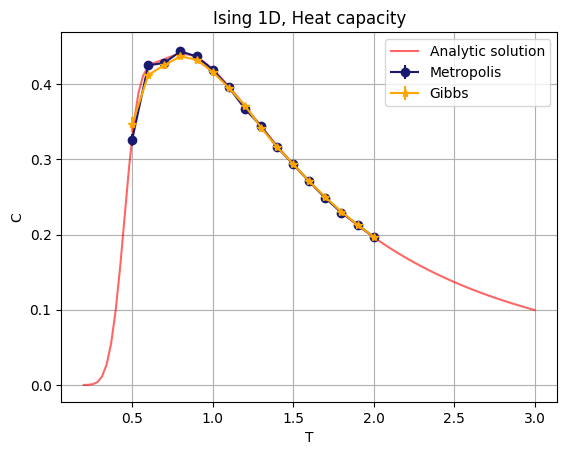

In [55]:
import numpy as np
import matplotlib.pyplot as plt

# Definizione dei parametri
points = 100
T = np.linspace(0.2, 3.0, num=points)
beta = 1 / T
J = 1.0
Ns = 50
th = np.tanh(J / T)
thN = th ** Ns
ch = 1 / th

# Algoritmi e parametri di plotting
alg = ["Metropolis", "Gibbs"]
marker = ['o', '*']
colors = ['midnightblue', 'orange']

# Lettura e plotting dei dati sperimentali
for i in range(2):
    t = []
    mean = []
    sigma = []
    file_path = f"ISING_1D/OUTPUT/{alg[i]}/heat_capacity.out"
    with open(file_path, "r") as file:
        for line in file:
            elements = line.split()
            t.append(float(elements[0]))
            mean.append(float(elements[1]))
            sigma.append(float(elements[2]))
    plt.errorbar(t, mean, yerr=sigma, marker=marker[i], markersize=6, label=alg[i], color=colors[i])
    plt.grid(True)

# Calcolo della capacità termica teorica
heat = ((beta * J) ** 2) * (
    (1 + thN + (Ns - 1) * (th ** 2) + (Ns - 1) * (ch ** 2) * thN) / (1 + thN) - 
    Ns * ((th + ch * thN) / (1 + thN)) ** 2
)

# Plot della soluzione analitica
plt.plot(T, heat, color="red", alpha=0.6, label="Analytic solution")

# Titoli e etichette
plt.title('Ising 1D, Heat capacity')
plt.xlabel('T')
plt.ylabel('C')
plt.legend()
plt.show()

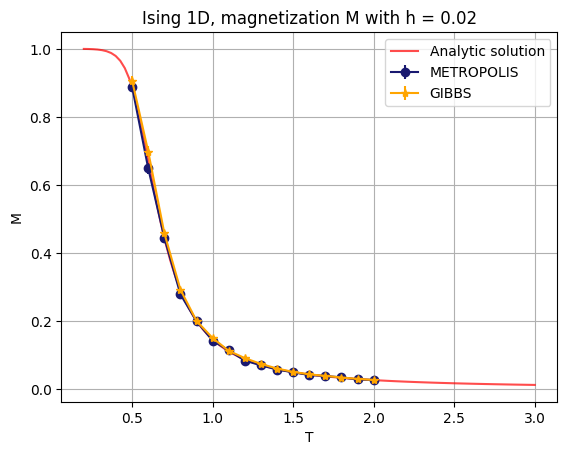

In [56]:
alg = ["METROPOLIS","GIBBS"]

for i in range(2):
    t = []
    mean = []
    sigma = []
    file = open("ISING_1D/OUTPUT/"+alg[i]+"/magnetization.out", "r")
    for line in file: # to read every line of the file
        elements = line.split()
        t.append(float(elements[0]))
        mean.append(float(elements[1]))
        sigma.append(float(elements[2]))   
    plt.errorbar(t,mean,yerr=sigma,marker=marker[i], markersize=6, label=alg[i], color=colors[i])
    plt.grid(True)

h=0.02 #external field
b = 1/T

l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)

plt.plot(T, M, color="red", alpha=0.7, label="Analytic solution")
plt.title('Ising 1D, magnetization M with h = 0.02')
plt.xlabel('T')
plt.ylabel('M')
plt.legend()
plt.show()

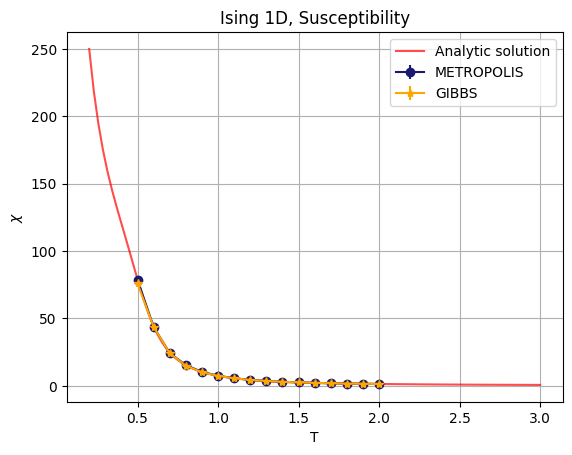

In [57]:
X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)

alg = ["METROPOLIS","GIBBS"]

for i in range(2):
    t = []
    mean = []
    sigma = []
    file = open("ISING_1D/OUTPUT/"+alg[i]+"/susceptibility.out", "r")
    for line in file: # to read every line of the file
        elements = line.split()
        t.append(float(elements[0]))
        mean.append(float(elements[1]))
        sigma.append(float(elements[2]))   
    plt.errorbar(t,mean,yerr=sigma,marker=marker[i],markersize=6, color=colors[i], label=alg[i])

plt.grid(True)
plt.plot(T, X, color="red", alpha=0.7, label="Analytic solution")
plt.title('Ising 1D, Susceptibility')
plt.xlabel('T')
plt.ylabel('$\chi$')
plt.legend()
plt.show()